In [138]:
import query
import pandas as pd 
import numpy as np
import sql_db
import seaborn as sn
import sys
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

patient = pd.read_csv("/Users/tedlinghu/Downloads/patient.csv")
hospital = pd.read_csv("/Users/tedlinghu/Downloads/hospital.csv")
apache_vars = pd.read_csv("/Users/tedlinghu/Downloads/apacheApsVar.csv")
cpc = pd.read_csv("/Users/tedlinghu/Downloads/carePlanCareProvider.csv")
apache_patient_result = pd.read_csv("/Users/tedlinghu/Downloads/apachePatientResult.csv")
treatment = pd.read_csv("/Users/tedlinghu/Downloads/treatment.csv")

In [112]:
len(apache_patient_result['patientunitstayid'].unique())

148532

In [139]:
len(treatment['patientunitstayid'].unique())

152429

In [34]:
len(patient['patientunitstayid'].unique())

200859

In [35]:
len(apache_vars['patientunitstayid'].unique())

171177

In [36]:
len(cpc['patientunitstayid'].unique())

172967

In [78]:
print(len(cpc['patientunitstayid'].unique()))

172967


In [38]:
len(set(patient['patientunitstayid']).intersection(apache['patientunitstayid']))

171177

In [39]:
print(hospital.shape)

(208, 4)


In [40]:
hospital.columns

Index(['hospitalid', 'numbedscategory', 'teachingstatus', 'region'], dtype='object')

In [41]:
hospital['region'].isnull().sum()

26

In [42]:
hospital.loc[hospital['region'].isnull()]

,hospitalid,numbedscategory,teachingstatus,region
13,83,NaN,f,NaN
15,85,NaN,f,NaN
23,96,NaN,f,NaN
24,102,NaN,f,NaN
41,143,250 - 499,f,NaN
58,176,NaN,f,NaN
73,201,100 - 249,f,NaN
75,203,100 - 249,f,NaN
81,209,NaN,f,NaN
83,212,NaN,t,NaN


In [43]:
idx1 = hospital.loc[hospital['region'].isnull()].index
idx2 = hospital.loc[hospital['numbedscategory'].isnull()].index
total_idx = idx1.union(idx2)

hospital = hospital.drop(labels = total_idx, axis = 0)


In [44]:
hospital['region'].isnull().sum()

0

(array([57.,  0.,  0., 50.,  0.,  0., 39.,  0.,  0., 13.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

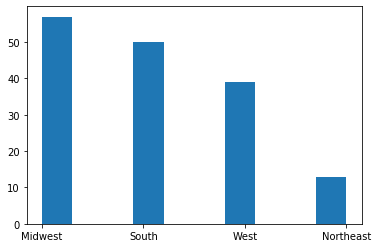

In [45]:
plt.hist(hospital['region'])

(array([46.,  0.,  0., 59.,  0.,  0., 22.,  0.,  0., 32.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

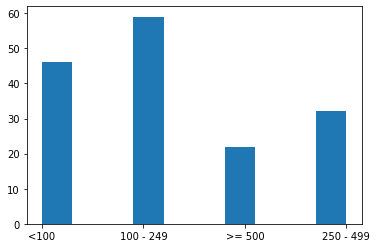

In [46]:
plt.hist(hospital['numbedscategory'])

In [47]:
south_hosp = hospital.loc[hospital['region'] == 'South']
midwest_hosp = hospital.loc[hospital['region'] == 'Midwest']
west_hosp = hospital.loc[hospital['region'] == 'West']
northeast_hosp = hospital.loc[hospital['region'] == 'Northeast']

(array([20.,  0.,  0., 12.,  0.,  0.,  9.,  0.,  0.,  9.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

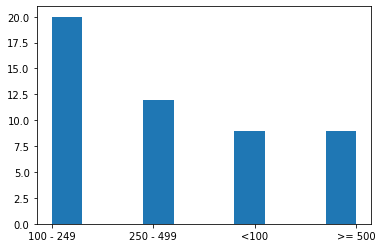

In [48]:
plt.hist(south_hosp['numbedscategory'])

(array([20.,  0.,  0., 23.,  0.,  0.,  8.,  0.,  0.,  6.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

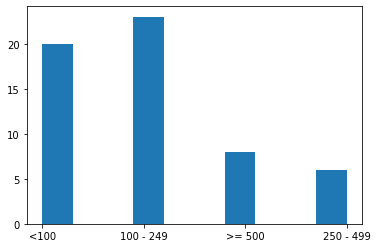

In [49]:
plt.hist(midwest_hosp['numbedscategory'])

(array([12.,  0.,  0., 13.,  0.,  0., 11.,  0.,  0.,  3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

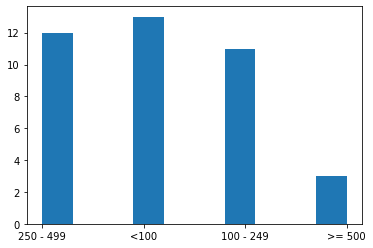

In [50]:
plt.hist(west_hosp['numbedscategory'])

(array([2., 0., 0., 5., 0., 0., 4., 0., 0., 2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

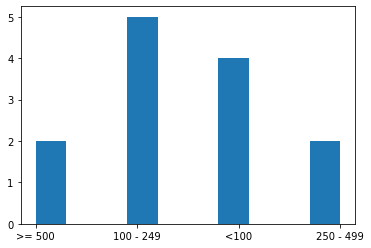

In [51]:
plt.hist(northeast_hosp['numbedscategory'])

In [52]:
south_hosp.shape

(50, 4)

In [53]:
west_hosp.shape

(39, 4)

In [54]:
northeast_hosp.shape

(13, 4)

In [55]:
midwest_hosp.shape

(57, 4)

In [60]:
south_hosp_id = south_hosp['hospitalid']
west_hosp_id = west_hosp['hospitalid']
midwest_hosp_id = midwest_hosp['hospitalid']
northeast_hosp_id = northeast_hosp['hospitalid']

In [57]:
south_hosp_id

26     110
27     112
28     115
29     120
30     122
31     123
32     125
33     131
35     135
36     136
38     140
39     141
40     142
42     144
60     180
62     182
63     183
64     184
65     188
66     194
67     195
68     196
70     198
79     207
80     208
82     210
84     215
85     217
86     220
87     224
90     243
91     244
92     245
93     246
123    301
125    307
127    312
128    318
136    345
182    417
190    428
193    434
194    435
195    436
196    437
198    439
199    440
200    443
206    458
207    459
Name: hospitalid, dtype: int64

In [143]:
south_patient = patient[patient.hospitalid.isin(south_hosp_id)]
west_patient = patient[patient.hospitalid.isin(west_hosp_id)]
midwest_patient = patient[patient.hospitalid.isin(midwest_hosp_id)]
northeast_patient = patient[patient.hospitalid.isin(northeast_hosp_id)]

south_patient.to_csv(path_or_buf = "/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/south_patient.csv")
west_patient.to_csv(path_or_buf = "/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/west_patient.csv")
midwest_patient.to_csv(path_or_buf = "/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/midwest_patient.csv")
northeast_patient.to_csv(path_or_buf = "/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/northeast_patient.csv")


In [62]:
south_patient.shape

(56665, 29)

In [63]:
west_patient.shape

(40651, 29)

In [64]:
midwest_patient.shape

(58974, 29)

In [65]:
northeast_patient.shape

(14429, 29)

In [81]:
south_patient.unitdischargestatus.isnull().sum()

11

In [96]:
south_patient.shape

(56665, 29)

In [97]:
south_patient = south_patient.drop(south_patient.loc[south_patient['unitdischargestatus'].isnull()].index)

Alive      53186
Expired     3468
Name: unitdischargestatus, dtype: int64


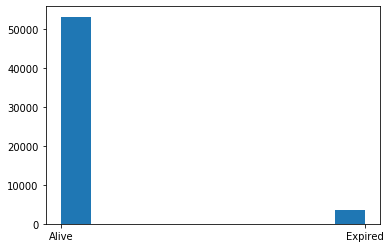

In [107]:
plt.hist(south_patient['unitdischargestatus'])
print(south_patient['unitdischargestatus'].value_counts())

In [100]:
south_caucasian = south_patient.loc[south_patient['ethnicity'] == "Caucasian"]
south_minorities = south_patient.loc[south_patient['ethnicity'] != "Caucasian"]

Alive      36013
Expired     2331
Name: unitdischargestatus, dtype: int64


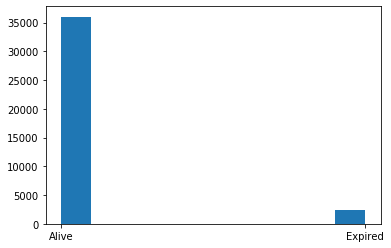

In [108]:
plt.hist(south_caucasian['unitdischargestatus'])
print(south_caucasian['unitdischargestatus'].value_counts())

Alive      17173
Expired     1137
Name: unitdischargestatus, dtype: int64


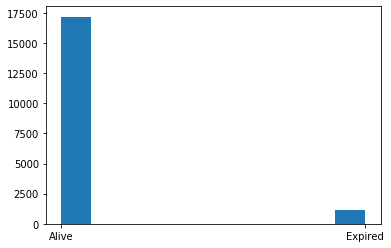

In [109]:
plt.hist(south_minorities['unitdischargestatus'])
print(south_minorities['unitdischargestatus'].value_counts())

In [113]:
apache_patient_result.columns

Index(['apachepatientresultsid', 'patientunitstayid', 'physicianspeciality',
       'physicianinterventioncategory', 'acutephysiologyscore', 'apachescore',
       'apacheversion', 'predictedicumortality', 'actualicumortality',
       'predictediculos', 'actualiculos', 'predictedhospitalmortality',
       'actualhospitalmortality', 'predictedhospitallos', 'actualhospitallos',
       'preopmi', 'preopcardiaccath', 'ptcawithin24h', 'unabridgedunitlos',
       'unabridgedhosplos', 'actualventdays', 'predventdays',
       'unabridgedactualventdays'],
      dtype='object')

In [115]:
apache_patient_result.actualicumortality

0         EXPIRED
1         EXPIRED
2           ALIVE
3           ALIVE
4           ALIVE
           ...   
297059      ALIVE
297060      ALIVE
297061      ALIVE
297062      ALIVE
297063      ALIVE
Name: actualicumortality, Length: 297064, dtype: object

In [123]:
apache_patient_result.actualicumortality
apache_patient_result["act_icu_death_cat"] = [0 if x == "EXPIRED" else 1 for x in apache_patient_result['actualicumortality']] 






In [125]:
apache_patient_result["pred_icu_death_cat"] = [0 if x > 0.5 else 1 for x in apache_patient_result['predictedicumortality']] 

In [130]:
from sklearn.metrics import *

print(confusion_matrix(apache_patient_result.act_icu_death_cat, apache_patient_result.pred_icu_death_cat))

#auc(apache_patient_result.act_icu_death_cat, apache_patient_result.pred_icu_death_cat)

print("f1", f1_score(apache_patient_result.act_icu_death_cat, apache_patient_result.pred_icu_death_cat))

print("acc", accuracy_score(apache_patient_result.act_icu_death_cat, apache_patient_result.pred_icu_death_cat))

[[  4967  12263]
 [  4468 275366]]
f1 0.9705161393782503
acc 0.9436788032208547


In [132]:
south_patient_apache = apache_patient_result[apache_patient_result.patientunitstayid.isin(south_patient.patientunitstayid)]
west_patient_apache = apache_patient_result[apache_patient_result.patientunitstayid.isin(west_patient.patientunitstayid)]

northeast_patient_apache = apache_patient_result[apache_patient_result.patientunitstayid.isin(northeast_patient.patientunitstayid)]
midwest_patient_apache = apache_patient_result[apache_patient_result.patientunitstayid.isin(midwest_patient.patientunitstayid)]




(array([85284.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9488.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

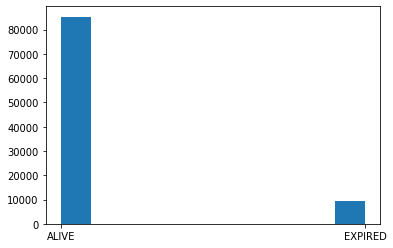

In [133]:
plt.hist(south_patient_apache['actualhospitalmortality'])

(array([89074.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5698.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

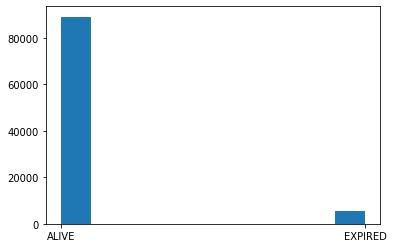

In [134]:
plt.hist(south_patient_apache['actualicumortality'])